Auswertung
===

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
from scipy.stats import chi2

Werte 
---

In [2]:
# Widerstände
RG3 = 48.7 # kOhm
sig_RG3 = 0.02 * RG3
RG2 = 274 # kOhm
sig_RG2 = 0.02 * RG2
RG1 = 680 # kOhm
sig_RG1 = 0.02 * RG1
RE = 3

# Tabelle 1: RG3
UE1 = np.array([-0.25, -0.2, -0.15, -0.1, -0.05, 0.05, 0.1, 0.2]) # V
UA1 = np.array([4.15, 3.40, 2.58, 1.72, 1.00, -0.67, -1.43, -3.17]) # V
sig_UA1 = np.ones(8) * 0.01

# Tabelle 2: RG2
UE2 = UE1
UA2 = np.array([14.4, 14.4, 14.0, 9.33, 5.03, -4.19, -8.40, -13.6])
sig_UA2 = sig_UA1

# Tabelle 3
UG = np.array([1, 0.8, 0.6, 0.5, 0.4, 0.2]) / 10 # 10^-1 mitberücksichtigt
UA3_2 = np.array([7.1, 5.70, 4.30, 3.6, 2.9, 1.6]) # V, RG2
sig_UA3_2 = np.array([0.2, 0.05, 0.05, 0.05, 0.05, 0.05])
UA3_1 = np.array([17.8, 14.4, 10.8, 9.0, 7.2, 5.4]) # V, RG1
sig_UA3_1 = np.ones(6) * 0.05

# Tabelle 4
f4 = np.array([0.1, 0.3, 0.7, 1, 3, 7, 10, 30, 70, 150, 200, 250]) # kHz
UA4_2 = np.array([2.32, 2.24, 2.24, 2.24, 2.24, 2.08, 2.00, 1.10, 0.64, 
                  0.32, 0.24, 0.15]) # V, RG2
sig_UA4_2 = np.ones(len(UA4_2)) * 0.05
UA4_1 = np.array([5.6, 5.6, 5.4, 5.4, 5.4, 4.4, 3.2, 1.2, 0.8, 0.4, 0.4,
                 0.4])
sig_UA4_1 = np.ones(len(UA4_1)) * 0.05

# Tabelle 5
f5 = f4
#UG = 1 # Vss
UA5 = np.array([1.24, 1.24, 1.24, 1.24, 1.24, 1.22, 1.22, 1.08, 0.78, 0.46, 0.36,
               0.30]) # V

# Tabelle 6: RG3
f6 = f4
CG = 560 # pF
UA6 = np.array([1.23, 1.23, 1.23, 1.22, 1.14, .87, .71, .27, .126, .064, .045,
               .036]) # V
sig_UA6 = np.array(len(UA6)) * 0.005

# Tabelle 7: RG3
f7 = np.array([.3, .5, .7, 1, 3, 7, 10, 13, 15, 17]) # kHz
CE = 47 # nF
UA7 = np.array([.4, .6, .76, .91, 1.2, 1.24, 1.24, 1.22, 1.22, 1.18]) # V
sig_UA7 = np.ones(len(UA7)) * 0.01

Aufgabe 1
---

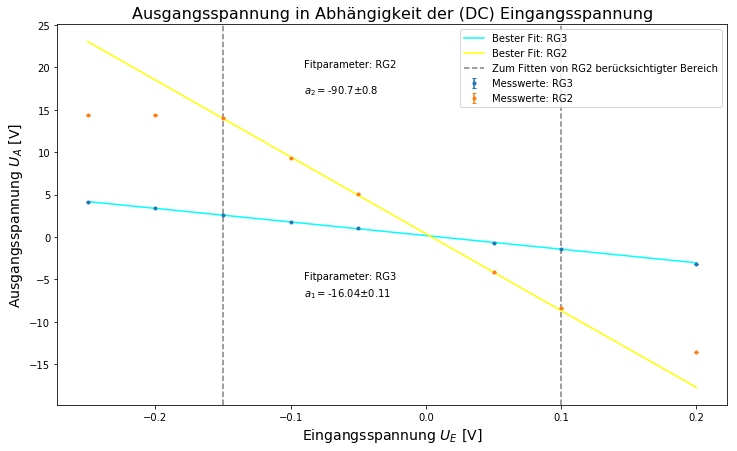

Verstärkung: RG3
Experimentell: V3_o =  16.04 +/- 0.11
Theoretisch: V3_o = 16.2 +/- 0.3

Verstärkung: RG2
Experimentell: V2_o =  90.7 +/- 0.8
Theoretisch: V2_o = 91.3 +/- 1.8


In [3]:
# Plot: Tabelle 1, 2
plt.figure(0, figsize = (12, 7))
plt.errorbar(UE1, UA1, yerr = sig_UA1, fmt = '.', capsize = 2, 
             label = 'Messwerte: RG3')
plt.errorbar(UE2, UA2, yerr = sig_UA2, fmt = '.', capsize = 2,
            label = 'Messwerte: RG2')
plt.title('Ausgangsspannung in Abhängigkeit der (DC) Eingangsspannung',
         size = 16)
plt.xlabel('Eingangsspannung $U_E$ [V]', size = 14)
plt.ylabel('Ausgangsspannung $U_A$ [V]', size = 14)

# Fit
def line(x, a, b):
    return a * x + b


xmin1 = 0
xmax1 = -1
popt1, pcov1 = curve_fit(line, UE1[xmin1:xmax1], UA1[xmin1:xmax1])

xmin2 = 2
xmax2 = -2
popt2, pcov2 = curve_fit(line, UE2[xmin2:xmax2], UA2[xmin2:xmax2])

# Fitparameter
a1 = popt1[0]
sig_a1 = sqrt(pcov1[0,0])
b2 = popt1[1]
sig_b1 = sqrt(pcov1[1,1])

a2 = popt2[0]
sig_a2 = sqrt(pcov2[0,0])
b2 = popt2[1]
sig_b2 = sqrt(pcov2[1,1])


# Back tu ze plot
# RG3
plt.plot(UE1, line(UE1, *popt1), label = 'Bester Fit: RG3', color = 'cyan')
plt.text(-0.09, -5, 'Fitparameter: RG3')
plt.text(-0.09, -7, '$a_1 =$' + str(np.round(a1, 2)) + '$\pm$' 
         + str(np.round(sig_a1, 2)))

# RG2
plt.plot(UE2, line(UE2, *popt2), label = 'Bester Fit: RG2', color = 'yellow')
plt.text(-0.09, 20, 'Fitparameter: RG2')
plt.text(-0.09, 17, '$a_2 =$' + str(np.round(a2, 1)) + '$\pm$' 
         + str(np.round(sig_a2, 1)))
plt.axvline(UE2[xmin2], ls = '--', color = 'gray')
plt.axvline(UE2[xmax2], ls = '--', color = 'gray', 
            label = 'Zum Fitten von RG2 berücksichtigter Bereich')

plt.legend(loc = 'upper right')
plt.savefig('images/242/V242Diagramm1.png')
plt.show()

# Ergebnisse:
print('Verstärkung: RG3')
print('Experimentell: V3_o = ', np.abs(np.round(a1, 2)), '+/-', np.round(sig_a1, 2))
print('Theoretisch: V3_o =', np.round(RG3 / RE, 1), '+/-', np.round(sig_RG3 / RE, 1))

print('\nVerstärkung: RG2')
print('Experimentell: V2_o = ', np.abs(np.round(a2, 1)), '+/-', np.round(sig_a2, 1))
print('Theoretisch: V2_o =', np.round(RG2 / RE, 1), '+/-', np.round(sig_RG2 / RE, 1))

In [4]:
# Güte des Fits: RG3
chi2_= np.sum((line(UE1[xmin1:xmax1], *popt1) - UA1[xmin1:xmax1]) ** 2 
              / sig_UA1[xmin1:xmax1] ** 2) 
dof = len(sig_UA1[xmin1:xmax1]) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 59.72463768115931
chi2_red = 11.944927536231862
Wahrscheinlichkeit = 0.0 %


In [5]:
# Güte des Fits: RG2
chi2_= np.sum((line(UE2[xmin2:xmax2], *popt2) - UA2[xmin2:xmax2]) ** 2 
              / sig_UA2[xmin2:xmax2] ** 2) 
dof = len(sig_UA2[xmin2:xmax2]) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 288.9714285714292
chi2_red = 144.4857142857146
Wahrscheinlichkeit = 0.0 %


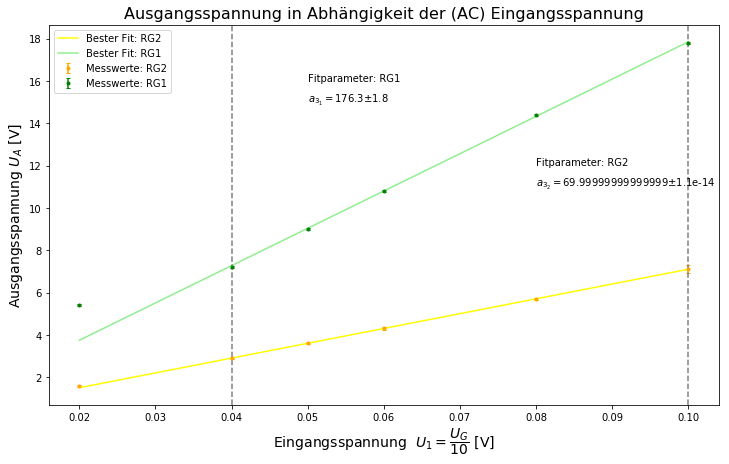

Verstärkung: RG2
Experimentell: V3_2_o =  69.99999999999999 +/- 1e-14
Theoretisch: V3_2_o = 91.3 +/- 1.8

Verstärkung: RG1
Experimentell: V3_1_o =  176.3 +/- 1.8
Theoretisch: V3_1_o = 227.0 +/- 5.0


In [6]:
# Plot: Tabelle 3
plt.figure(1, figsize = (12, 7))
plt.errorbar(UG, UA3_2, yerr = sig_UA3_2, fmt = '.', capsize = 2, 
             label = 'Messwerte: RG2', color = 'orange')
plt.errorbar(UG, UA3_1, yerr = sig_UA3_1, fmt = '.', capsize = 2, 
             label = 'Messwerte: RG1', color = 'green')
plt.title('Ausgangsspannung in Abhängigkeit der (AC) Eingangsspannung',
         size = 16)
plt.xlabel('Eingangsspannung  $U_1 = \dfrac{U_G}{10}$ [V]', size = 14)
plt.ylabel('Ausgangsspannung $U_A$ [V]', size = 14)

# Fit

xmin3_2 = 0
xmax3_2 = -1
popt3_2, pcov3_2 = curve_fit(line, UG[xmin3_2:xmax3_2], UA3_2[xmin3_2:xmax3_2])

xmin3_1 = 0
xmax3_1 = -2
popt3_1, pcov3_1 = curve_fit(line, UG[xmin3_1:xmax3_1], UA3_1[xmin3_1:xmax3_1])

# Fitparameter
a3_2 = popt3_2[0]
sig_a3_2 = sqrt(pcov3_2[0,0])
b3_2 = popt3_2[1]
sig_b3_2 = sqrt(pcov3_2[1,1])

a3_1 = popt3_1[0]
sig_a3_1 = sqrt(pcov3_1[0,0])
b3_1 = popt3_1[1]
sig_b3_1 = sqrt(pcov3_1[1,1])

# Back 2 the ploture
# RG2
plt.plot(UG, line(UG, *popt3_2), label = 'Bester Fit: RG2', color = 'yellow')
plt.text(0.08, 12, 'Fitparameter: RG2')
plt.text(0.08, 11, '$a_{3_2} = $' + str(np.round(a3_2, 15)) + '$\pm$' 
         + str(np.round(sig_a3_2, 15)))

# RG1
plt.plot(UG, line(UG, *popt3_1), label = 'Bester Fit: RG1', color = 'lightgreen')
plt.text(0.05, 16, 'Fitparameter: RG1')
plt.text(0.05, 15, '$a_{3_1} = $' + str(np.round(a3_1, 1)) + '$\pm$' 
         + str(np.round(sig_a3_1, 1)))
plt.axvline(UG[xmin3_1], ls = '--', color = 'gray')
plt.axvline(UG[xmax3_1], ls = '--', color = 'gray')

plt.legend(loc = 'upper left')
plt.savefig('images/242/V242Diagramm2.png')
plt.show()

# Ergebnisse
print('Verstärkung: RG2')
print('Experimentell: V3_2_o = ', np.abs(np.round(a3_2, 14)), '+/-', 
      np.round(sig_a3_2, 14))
print('Theoretisch: V3_2_o =', np.round(RG2 / RE, 1), '+/-', 
      np.round(sig_RG2 / RE, 1))

print('\nVerstärkung: RG1')
print('Experimentell: V3_1_o = ', np.abs(np.round(a3_1, 1)), '+/-', 
      np.round(sig_a3_1, 1))
print('Theoretisch: V3_1_o =', np.round(RG1 / RE, 0), '+/-', 
      np.round(sig_RG1 / RE, 0))

In [7]:
# Güte des Fits: RG2
chi2_= np.sum((line(UG[xmin3_2:xmax3_2], *popt3_2) - UA3_2[xmin3_2:xmax3_2]) ** 2 
              / sig_UA3_2[xmin3_2:xmax3_2] ** 2) 
dof = len(sig_UA3_2[xmin3_2:xmax3_2]) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 3.1554436208840468e-28
chi2_red = 1.0518145402946823e-28
Wahrscheinlichkeit = 100.0 %


In [8]:
# Güte des Fits: RG1
chi2_= np.sum((line(UG[xmin3_1:xmax3_1], *popt3_1) - UA3_1[xmin3_1:xmax3_1]) ** 2 
              / sig_UA3_1[xmin3_1:xmax3_1] ** 2) 
dof = len(sig_UA3_1[xmin3_1:xmax3_1]) - 2 #dof:degrees of freedom, Freiheitsgrad 
chi2_red = chi2_/dof

print("chi2 =", chi2_)
print("chi2_red =",chi2_red)

prob = np.round(1 - chi2.cdf(chi2_,dof),2) * 100 
print("Wahrscheinlichkeit =", prob, "%")

chi2 = 3.7966101694915038
chi2_red = 1.8983050847457519
Wahrscheinlichkeit = 15.0 %


Aufgabe 2
---

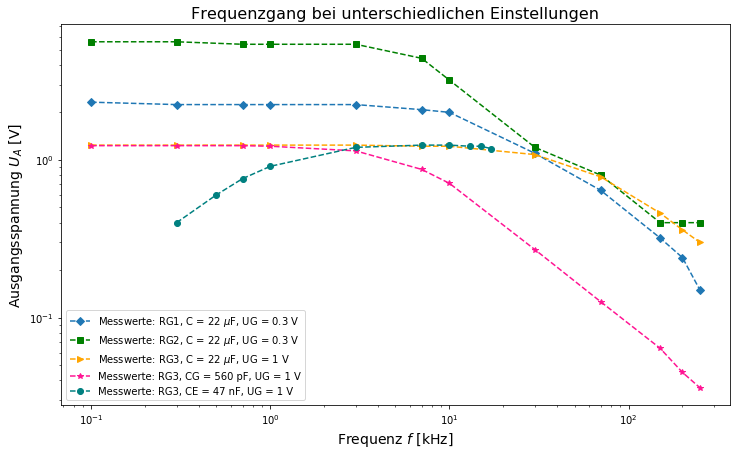

In [9]:
# Plot
plt.figure(figsize = (12, 7))
plt.loglog()
plt.plot(f4, UA4_2, 'D--', 
         label = 'Messwerte: RG1, C = 22 $\\mu$F, UG = 0.3 V')
plt.plot(f4, UA4_1, 's--', color = 'green', 
         label = 'Messwerte: RG2, C = 22 $\\mu$F, UG = 0.3 V')
plt.plot(f5, UA5, '>--', color = 'orange', 
         label = 'Messwerte: RG3, C = 22 $\\mu$F, UG = 1 V')
plt.plot(f6, UA6, '*--', color = 'deeppink', 
         label = 'Messwerte: RG3, CG = 560 pF, UG = 1 V')
plt.plot(f7, UA7, 'o--', color = 'teal', 
         label = 'Messwerte: RG3, CE = 47 nF, UG = 1 V')
plt.title('Frequenzgang bei unterschiedlichen Einstellungen', size = 16)
plt.xlabel('Frequenz $f$ [kHz]', size = 14)
plt.ylabel('Ausgangsspannung $U_A$ [V]', size = 14)


plt.legend(loc = 'best')
plt.savefig('images/242/V242Diagramm3.png')
plt.show()